In [1]:
"""Auction mechanism analysis"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
paper = [
    "paper_fog_v2_j4_s1_0",
    "paper_fog_v2_j8_s2_1",
    "paper_fog_v2_j12_s3_0",
    "paper_fog_v2_j12_s3_1",
    "paper_fog_v2_j4_s1_1",
    "paper_fog_v2_j8_s2_2",
    "paper_fog_v2_j12_s3_2",
    "paper_fog_v2_j16_s4_0"
]

encoded_filenames = paper
folder = 'paper'

In [8]:
data = []
model_names: List[str] = []
test_name: str = ''

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        json_data = json.load(file)
        
        for pos, results in enumerate(json_data):
            # Find the best results of sum value or percentage jobs from all of the algorithms
            best_sum_value = results['optimal']['sum value']
            best_percentage_jobs = results['optimal']['percentage jobs']
            
            for algo_name, algo_results in results.items():
                if type(algo_results) is dict:  # Otherwise optimal or relaxed == 'failure'
                    data.append((pos, model_name, algo_name, algo_results['sum value'],
                                 algo_results['percentage jobs'], algo_results['solve_time'],
                                 algo_results['sum value'] / best_sum_value,
                                 algo_results['percentage jobs'] / best_percentage_jobs))

df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Social Welfare', 'Percentage Jobs',
                                 'Solve Time', 'Best Social Welfare', 'Best Percentage Jobs'])

In [6]:
short_df = df[(df['Algorithm Name'] == 'optimal') | 
              (df['Algorithm Name'] == 'relaxed') | 
              (df['Algorithm Name'] == 'fixed')   |
              (df['Algorithm Name'] == 'Greedy Utility / Sum, minimise Sum, Percentage Sum')].replace('Greedy Utility / Sum, minimise Sum, Percentage Sum', 'Greedy Algorithm')
short_df

,Pos,Model Name,Algorithm Name,Sum Value,Percentage Jobs,Solve Time,Best Sum Value,Best Percentage Jobs
0,0,Tasks: 4 Servers: 1,optimal,268,0.750,0.154,1.000000,1.000000
1,0,Tasks: 4 Servers: 1,relaxed,268,0.750,0.156,1.000000,1.000000
2,0,Tasks: 4 Servers: 1,fixed,268,0.750,0.000,1.000000,1.000000
8,1,Tasks: 4 Servers: 1,optimal,200,0.750,0.251,1.000000,1.000000
9,1,Tasks: 4 Servers: 1,relaxed,200,0.750,0.247,1.000000,1.000000
...,...,...,...,...,...,...,...,...
441,4,Tasks: 12 Servers: 3,relaxed,641,0.917,3.422,0.995342,0.917000
442,4,Tasks: 12 Servers: 3,fixed,562,0.750,1.180,0.872671,0.750000
448,0,Tasks: 16 Servers: 4,optimal,688,0.812,180.040,0.959554,0.928000
449,0,Tasks: 16 Servers: 4,relaxed,717,0.875,60.045,1.000000,1.000000


Save file location: ../figures/price_change/png/all_shortened.png


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: ../figures/price_change/eps/all_shortened.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


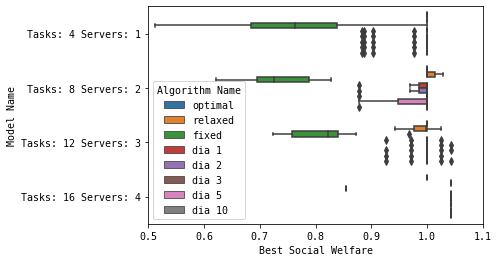

In [14]:
g = sns.boxplot(y='Model Name', x='Best Social Welfare', hue='Algorithm Name', data=df)
g.set_xlim(0.5, 1.1)
save_plot(analysis_filename('all', 'shortened'), "price_change", image_formats=[ImageFormat.PNG, ImageFormat.EPS])

Save file location: ../figures/price_change/png/all_shortened.png
Save file location: ../figures/price_change/eps/all_shortened.eps


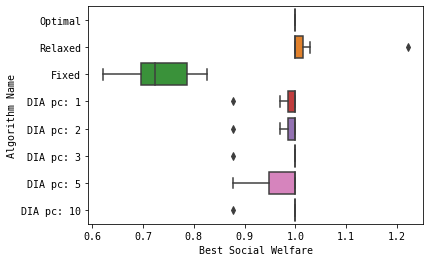

In [25]:
df_2 = df[df['Model Name'] == 'Tasks: 8 Servers: 2']
df_2 = df_2.replace('optimal', 'Optimal').replace('relaxed', 'Relaxed').replace('fixed', 'Fixed').replace('dia 1', 'DIA pc: 1').replace('dia 2', 'DIA pc: 2').replace('dia 3', 'DIA pc: 3').replace('dia 5', 'DIA pc: 5').replace('dia 10', 'DIA pc: 10')


g = sns.boxplot('Best Social Welfare', 'Algorithm Name', data=df_2)
save_plot(analysis_filename('all', 'shortened'), "price_change", image_formats=[ImageFormat.PNG, ImageFormat.EPS])